In [323]:
import numpy as np

In [324]:

from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from functools import partial

plt.rcParams["figure.figsize"] = (20,10)

def grad_batch(f_batch_size, batch_size):
    def grad_help(*args):
        h = 1e-10
        dim = len(args)
        f = f_batch_size(batch_size)
        return [(
                        f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                        -
                        f(*[args[j] - (h if j == i else 0) for j in range(dim)])
                ) / (2 * h)
                for i in range(dim)]
    return grad_help

def sgd_general(batch_size, f, lr0, d, epoch, x):
    points = np.zeros((epoch, len(x)))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, batch_size)(*x))
        points[i] = x
    return points

sgd = partial(sgd_general, 1)
gd = lambda f, lr0, d, epoch, x: sgd_general( f, lr0, d, epoch, x)

def regression(x, y):
    # if x.ndim == 1:
    #     print('hm')
    #     x_mat = np.array([np.full(len(x), 1), x]).T
    #     k = 2
    # else:
    #     print('hm hm hm')
    #     x_mat = np.insert(x, 0, 1, axis=1)
    #     k = len(np.array(x[0])) + 1
    x_mat = np.hstack((np.ones((x.shape[0], 1)), x))
    k = x_mat.shape[1]
    batch_choice = lambda batch_size: list(set(np.random.choice(np.arange(x.shape[0]), batch_size, replace=False)))
    f_batch_size = lambda batch_size: \
                       lambda *b, batch=batch_choice(batch_size): \
                           np.linalg.norm((y[batch] - x_mat[batch].dot(b)))
    bs = sgd(f_batch_size, 0.1, 0.01, 1000, np.full(k, 1))
    f = f_batch_size(x.shape[0])
    print(f'came close by {f(*bs[-1])}')
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()
    if len(x[0]) == 1:
        draw_2d(x, y, bs[-1])
    return bs[-1]

def draw_2d(x, y, bs):
    x = x.reshape(len(x))
    ax = plt.figure().add_subplot()
    ax.scatter(x, y)
    ax.grid(True)
    tmin = x.min() - 1
    tmax = x.max() + 1
    X = np.array([tmin, tmax])
    Y = (lambda z: bs[0] + bs[1] * z)(X)
    ax.add_line(mlines.Line2D(X, Y))


came close by 29.50107103651067


array([9.22774409, 4.61385383])

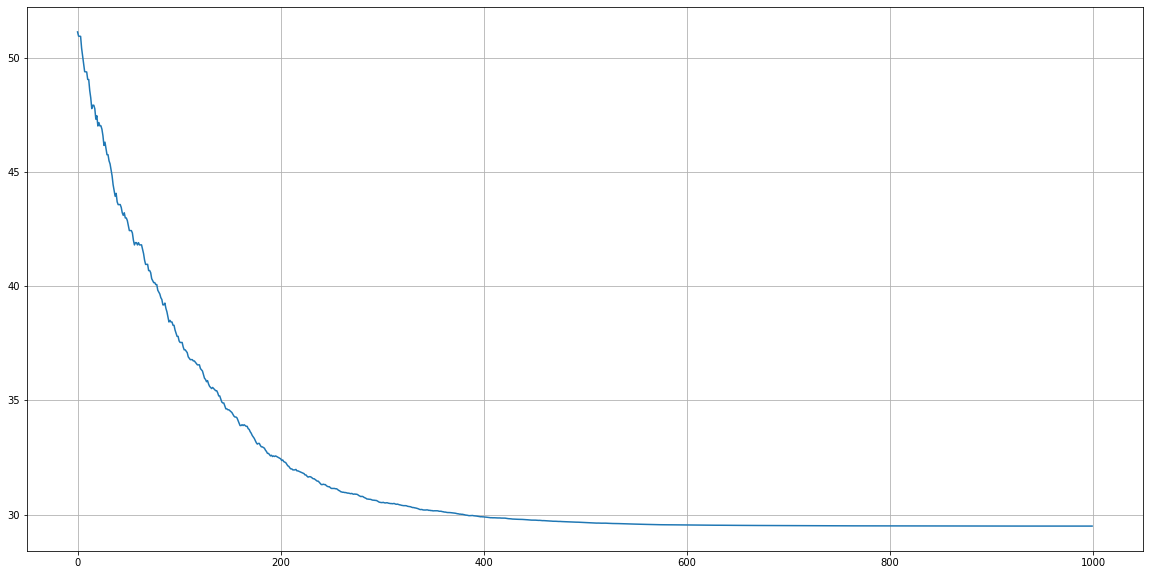

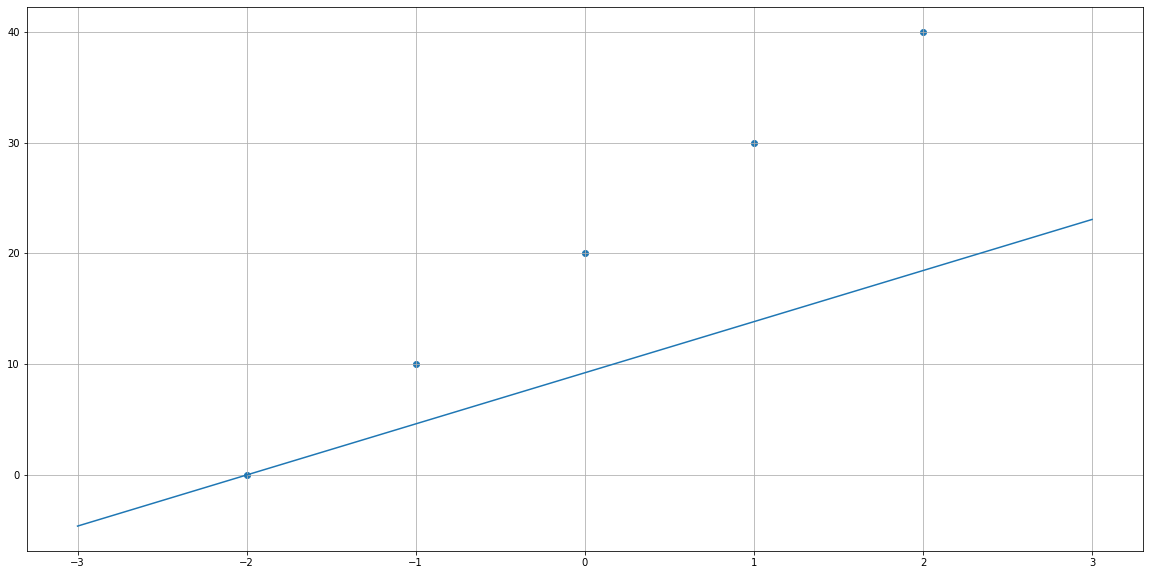

In [325]:
# regression(np.array([[-1], [ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7], [ 8]]), np.array([0, 0,1,1, 2, 2, 3, 3, 4, 4]))
regression(np.array([[-2], [-1], [ 0], [ 1], [2]]), np.array([0, 10, 20,30, 40]))
# regression(np.array([[-1], [ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7], [ 8]]), np.array([0, 0,1,1, 2, 2, 3, 3, 4, 4]))

came close by 2.5936541847626935
came close by 9.620838871632904
came close by 3.5761823703510847
came close by 2.4798717323513872
came close by 2.5632799631618877
came close by 8.153490268024406
came close by 90.04263202884194


array([ 0.10267539,  0.60778225,  0.27124339, -0.16681454,  0.22875016,
       -0.0403887 ,  0.01938126,  0.49164983,  0.72769292,  0.41678267])

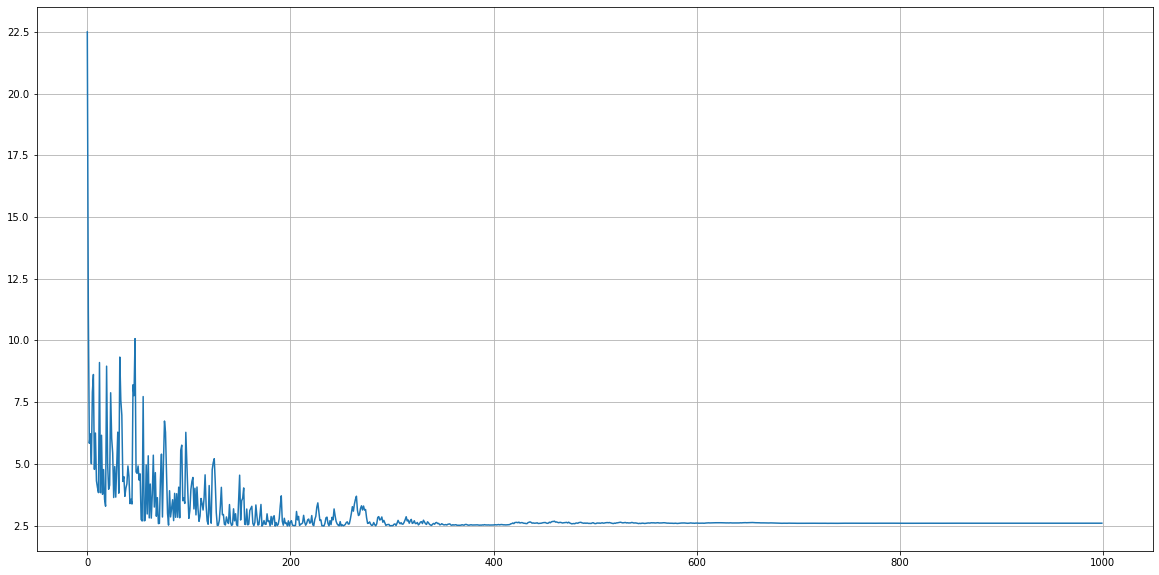

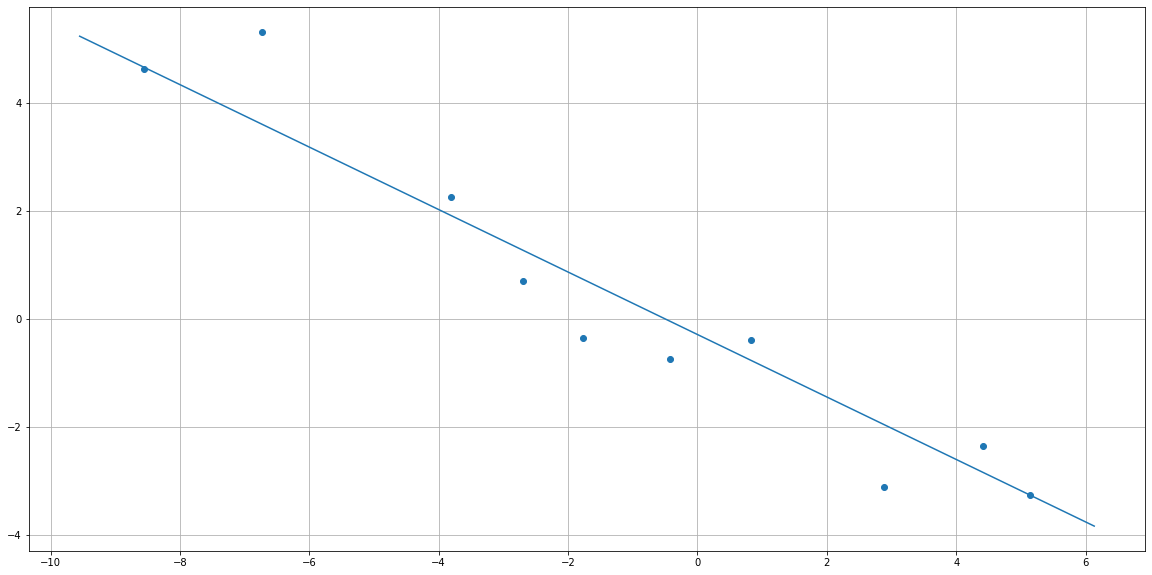

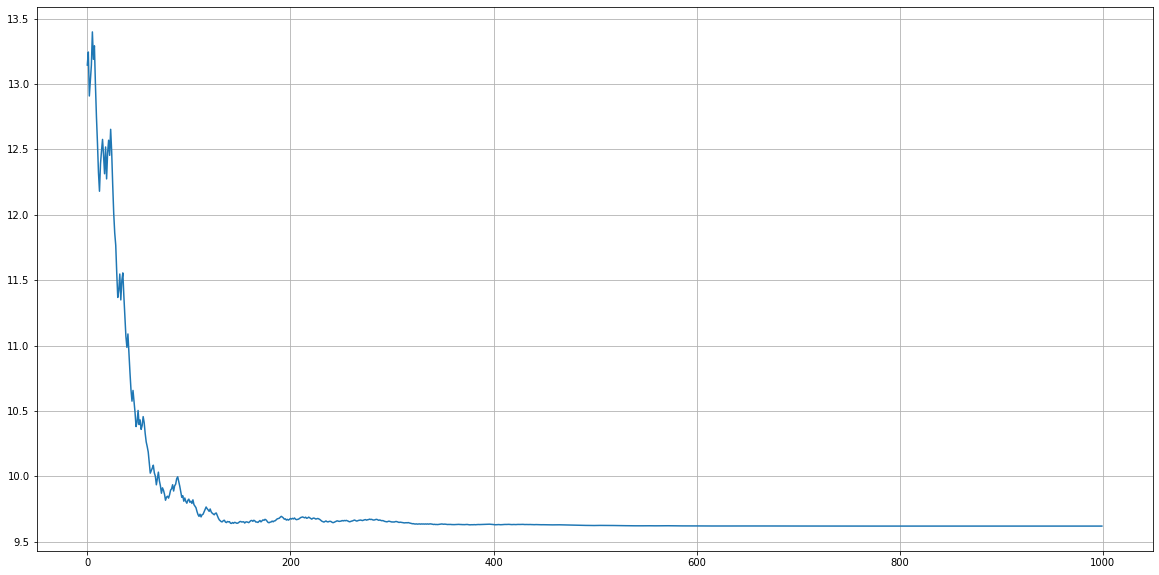

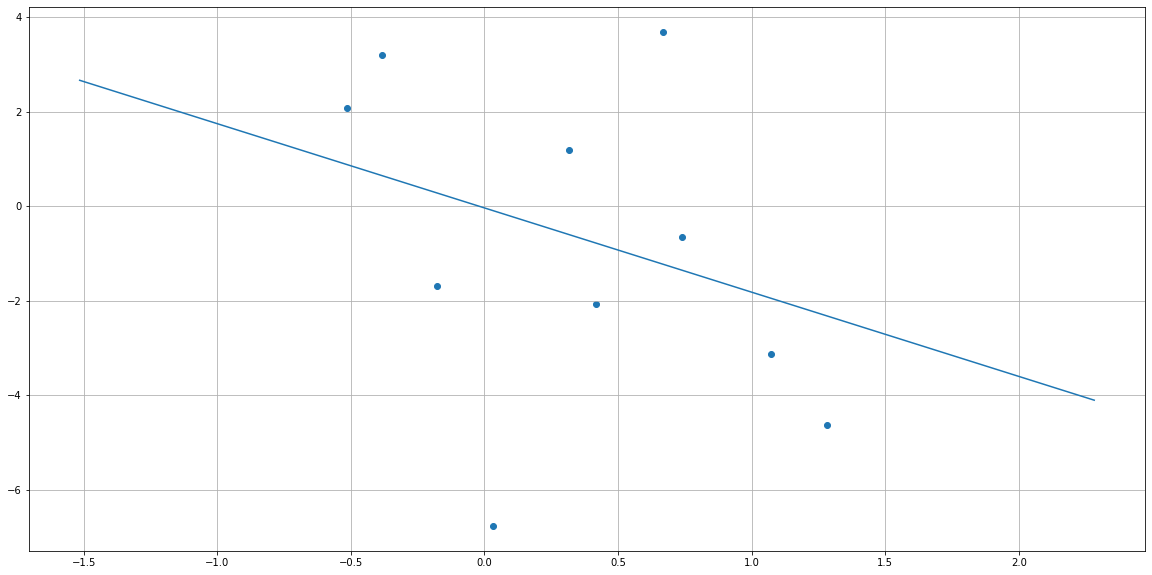

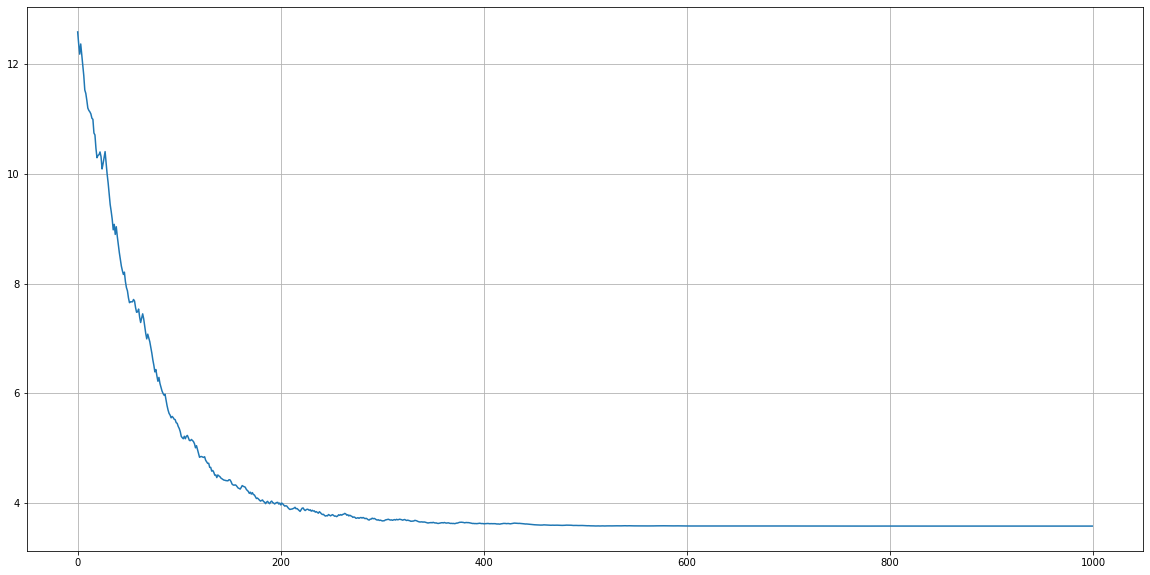

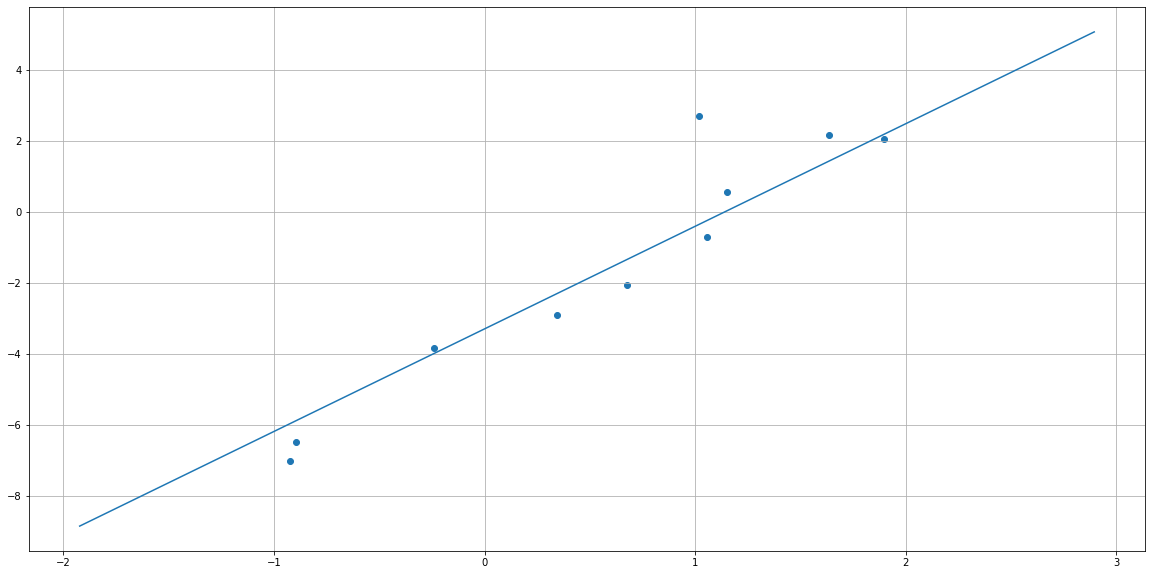

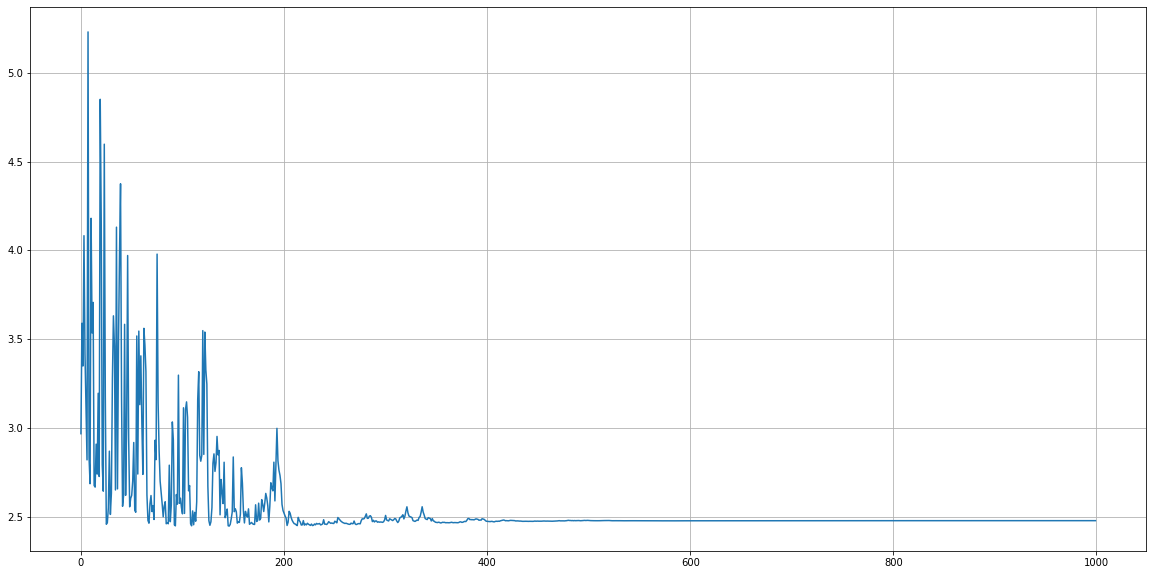

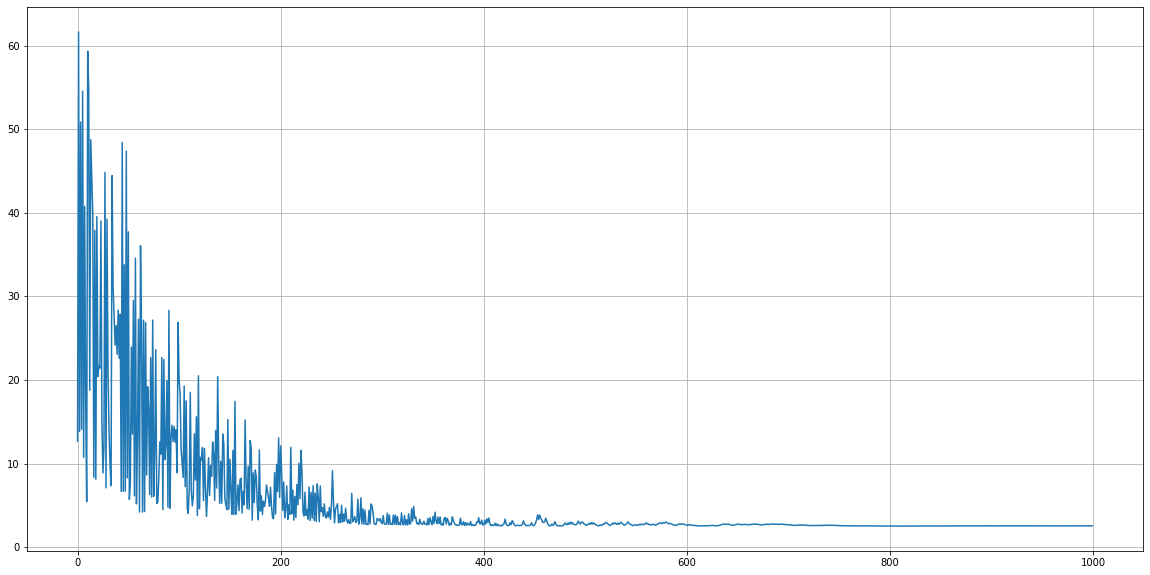

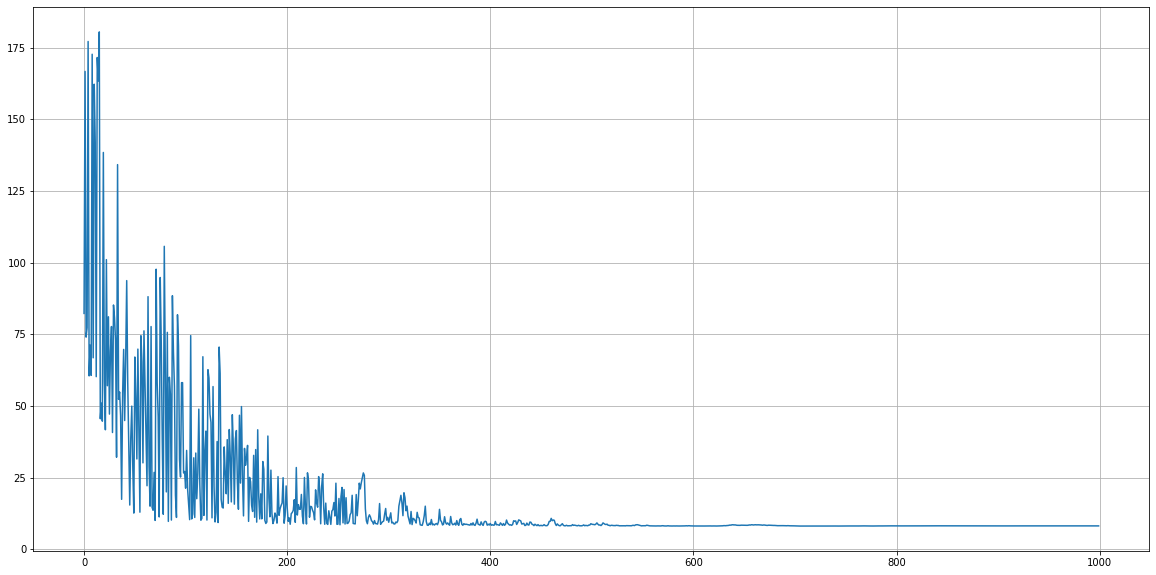

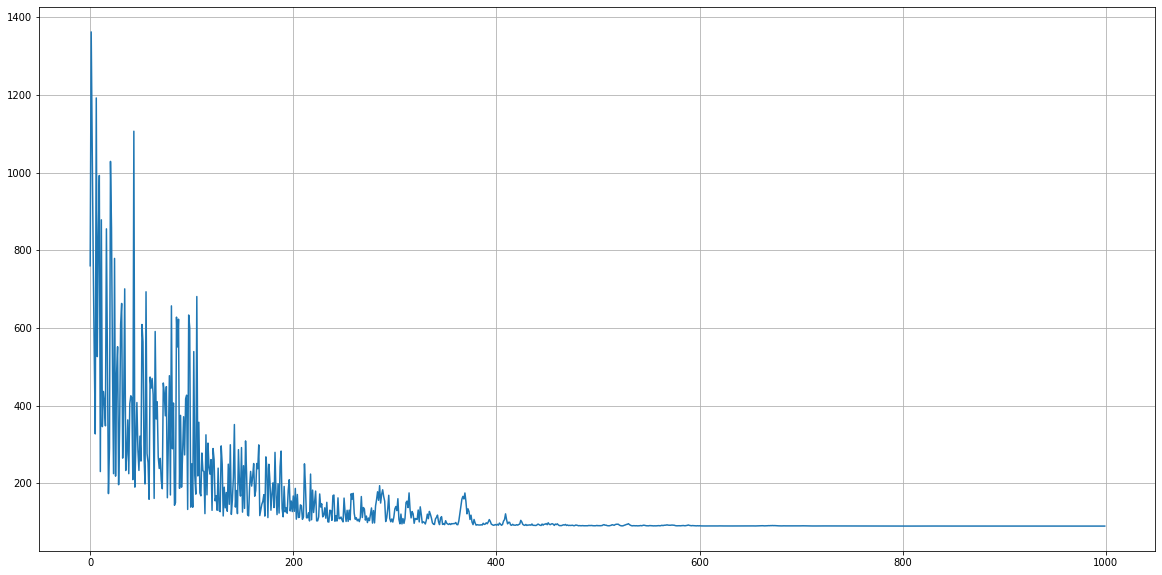

In [326]:
rand = lambda n: (np.random.rand(n)*2)-1

def random_perfect_line(n, k, limit, debug=False):
    m = rand(n)
    s = rand(n)
    ks = rand(k) * limit
    xy = np.array([m + s * k for k in ks])
    x = xy[:, :-1]
    y = xy[:, -1]
    if debug:
        print(f'{m=}\n{s=}\n{x=}\n{y=}')
    return x, y

def test_line(n, k, limit, eps):
    x, y = random_perfect_line(n, k, limit)
    x += np.array([rand(x.shape[1]) for _ in range(x.shape[0])])*eps
    y += rand(y.size)*eps
    return x, y

# line = random_perfect_line(2, 5, 10, True)
regression(*test_line(2, 10, 10, 1))
regression(*test_line(2, 10, 10, 1))
regression(*test_line(2, 10, 10, 1))
regression(*test_line(3, 10, 10, 1))
regression(*test_line(10, 10, 10, 1))
regression(*test_line(10, 100, 10, 1))
regression(*test_line(10, 10000, 10, 1))





